# Week 1
This week I began by learning about technical indicators (https://medium.com/analytics-vidhya/stock-trend-prediction-with-technical-indicators-feature-engineering-and-python-code-1fa54d5806ba , https://www.thepythoncode.com/article/introduction-to-finance-and-technical-indicators-with-python) as a means for financial forecasting. I gathered information from stocks in the S&P500 and used the recorded information from a random subsequent 20 days in the stock's history to predict risk adjusted return for each stock (https://www.investopedia.com/terms/r/riskadjustedreturn.asp). 

In [11]:
pip install yfinance matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import random

In [2]:
tesla = yf.Ticker('tsla')

In [3]:
history = tesla.history(period='max')

In [4]:
window = 20
tesla_length = len(history['Close'])
moving_avg = []
pr=[]
stdev_upper = []
stdev_lower = []
index = []
for i in range(tesla_length-200, tesla_length):
    history['Close'][i:i+window]
    mean = history['Close'][i:i+window].mean()
    moving_avg.append(mean)
    stdev_upper.append(mean+2*history['Close'][i:i+window].std())
    stdev_lower.append(mean-2*history['Close'][i:i+window].std())
    index.append(i)

In [5]:
stdev_lower

[566.4157380753568,
 571.6190665202633,
 574.2048855633257,
 580.2878396382681,
 583.6851742477304,
 589.3108267004093,
 589.2334073223981,
 588.2897185075745,
 588.3122432216451,
 585.9713800253608,
 580.9887822498284,
 577.9497448662062,
 576.5501714323784,
 576.936089855057,
 580.2937775102987,
 588.2646424317347,
 609.6548885680519,
 609.5914987907895,
 609.7791859196809,
 610.5968589373532,
 609.9792539455674,
 600.0456003554439,
 597.0707342530129,
 593.9737836762172,
 593.4775550709066,
 595.5493229334786,
 596.4098215421332,
 596.8748519853057,
 604.3136205268098,
 610.6112371757838,
 622.7666321118088,
 639.8769536581555,
 651.3230939761122,
 653.0088444907797,
 660.0585155838094,
 659.1592022851843,
 656.2293341266311,
 656.223229278026,
 652.4193574583867,
 651.5930741255698,
 637.6710258868816,
 625.0222110480307,
 605.1573588932656,
 584.5896929211567,
 572.4953899913481,
 558.4055064811607,
 546.9094625175094,
 536.74799547779,
 531.037957233802,
 527.146461314665,
 530.1

In [6]:
stdev_upper

[840.3522611922212,
 824.3309334797367,
 809.811117854643,
 794.0941610941537,
 777.2748233108634,
 759.0061715906063,
 754.6335909686175,
 751.9092744123474,
 740.7117496982769,
 738.8696172890923,
 738.1732172618903,
 730.4982531806688,
 726.8158258820747,
 727.9029055062712,
 728.5762176068888,
 729.9153502440465,
 721.3871036194481,
 721.1894887580386,
 722.5758006525848,
 719.5001320294438,
 720.9427370212294,
 736.3143910996343,
 744.824254760659,
 751.6252031401891,
 760.7834373607341,
 764.6876704747244,
 768.7261708895076,
 776.4571426436005,
 777.9603723931122,
 780.5637567207007,
 780.3573608081131,
 772.5920404824695,
 767.0239030942003,
 766.2451533119547,
 763.9644824630657,
 764.2487994238,
 765.3766656292282,
 765.3797736516616,
 767.1576444947384,
 767.5189253861489,
 774.1469733806966,
 772.2837887078286,
 777.9146442805625,
 781.7663129382183,
 778.8566119617768,
 779.1664966926674,
 776.5505411446,
 768.6460108698661,
 761.0650517994011,
 750.1045457654131,
 733.897

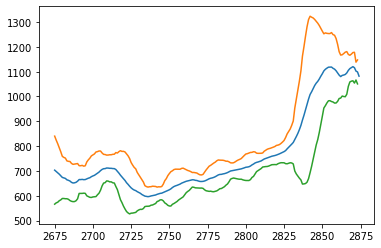

In [17]:
plt.plot(index, moving_avg)
plt.plot(index, stdev_upper)
plt.plot(index, stdev_lower)
plt.show()

In [8]:
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

In [9]:
tickers = list(table[0]['Symbol'])

In [10]:
stock_dict = {}
for i in tickers:
  ticker = yf.Ticker(i)
  ticker_history = ticker.history(period='max')
  stock_dict[i] = ticker_history

- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


In [12]:
ticker = yf.Ticker('spy')
spy = ticker.history(period='max')
aapl = stock_dict['AAPL']

In [13]:
pd.merge(aapl, spy, left_index=True, right_index=True)

,Open_x,High_x,Low_x,Close_x,Volume_x,Dividends_x,Stock Splits_x,Open_y,High_y,Low_y,Close_y,Volume_y,Dividends_y,Stock Splits_y
Date,,,,,,,,,,,,,,
1993-01-29,0.444203,0.451576,0.434988,0.438674,266100800,0.0,0.0,25.818120,25.818120,25.689672,25.799770,1003200,0.0,0
1993-02-01,0.436831,0.451576,0.436831,0.451576,240553600,0.0,0.0,25.818125,25.983273,25.818125,25.983273,480500,0.0,0
1993-02-02,0.447890,0.453419,0.444203,0.444203,182336000,0.0,0.0,25.964916,26.056665,25.909866,26.038315,201300,0.0,0
1993-02-03,0.449733,0.449733,0.431301,0.442360,264185600,0.0,0.0,26.075019,26.331916,26.056669,26.313566,529400,0.0,0
1993-02-04,0.442360,0.444203,0.434988,0.438674,208152000,0.0,0.0,26.405305,26.478704,26.111709,26.423655,531500,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-19,157.649994,161.020004,156.529999,160.550003,117147500,0.0,0.0,469.609985,470.940002,468.500000,468.890015,57288900,0.0,0
2021-11-22,161.679993,165.699997,161.000000,161.020004,117467900,0.0,0.0,470.890015,473.540009,467.350006,467.570007,72762000,0.0,0
2021-11-23,161.119995,161.800003,159.059998,161.410004,96041900,0.0,0.0,467.220001,469.100006,464.450012,468.190002,73206500,0.0,0


In [14]:
del stock_dict['BRK.B']
del stock_dict['BF.B']

In [15]:
y = []
x = []
tickers = []
for tick in stock_dict.keys():
    window = 20
    pred = 20
    sec = stock_dict[tick]
    merged = pd.merge(spy, sec, left_index=True, right_index=True)
    stock_len = len(merged) - window - pred
    start = random.choice(range(0, stock_len))
    moving_avg = []
    pr = []
    stdev_upper = []
    stdev_lower = []
    ind = []
    osc = []
    price = []
    pred_price = []
    spy_price = []
    spy_pred_price = []
    for i in range(start, start + window):
        mean = merged['Close_x'][i:i + window].mean()
        moving_avg.append(mean)
        stdev_upper.append(mean + 2 * merged['Close_x'][i:i + window].std())
        stdev_lower.append(mean - 2 * merged['Close_x'][i:i + window].std())
        ind.append(i)
        osc.append((merged['Close_x'][i] - merged['Close_x'][i + window]) / merged['Close_x'][i + window])
        price.append(merged['Close_x'][i])
        pred_price.append(merged['Close_x'][i + pred])
        spy_price.append(merged['Close_y'][i])
        spy_pred_price.append(merged['Close_y'][i + pred])
    temp_df = pd.DataFrame([moving_avg, stdev_upper, stdev_lower, osc])
    temp_df = temp_df.T
    temp_merged = merged[start:start + window]
    temp_df.index = temp_merged.index
    return_sst = []
    return_spy = []
    for i in range(0, len(price)):
        return_sst.append(pred_price[i] - price[-1])
        return_spy.append(spy_pred_price[i] - spy_price[-1])
    observed = (sum(return_sst) / len(return_sst) - sum(return_spy) / len(return_spy)) / statistics.stdev(return_sst)
    y.append(observed)
    tickers.append(tick)
    x.append(pd.merge(temp_df, temp_merged, right_index=True, left_index=True))

In [16]:
x[0]

,0,1,2,3,Open_x,High_x,Low_x,Close_x,Volume_x,Dividends_x,Stock Splits_x,Open_y,High_y,Low_y,Close_y,Volume_y,Dividends_y,Stock Splits_y
Date,,,,,,,,,,,,,,,,,,
1994-02-09,28.282791,28.640845,27.924737,0.017438,28.441734,28.554598,28.404113,28.535788,144600,0.0,0,12.315805,12.388507,12.243102,12.243102,1010800,0.00,0.0
1994-02-10,28.258337,28.610393,27.906282,0.003335,28.516980,28.535791,28.291252,28.291252,883900,0.0,0,12.214029,12.243110,12.126786,12.170407,1143200,0.00,0.0
1994-02-11,28.253635,28.606351,27.900919,0.005330,28.310076,28.460561,28.178401,28.385319,519400,0.0,0,12.141320,12.214022,12.112239,12.199482,805200,0.00,0.0
1994-02-14,28.246111,28.593377,27.898844,0.007333,28.328886,28.516993,28.291265,28.422939,2742100,0.0,0,12.228566,12.315809,12.126783,12.315809,1666800,0.00,0.0
1994-02-15,28.235765,28.573035,27.898495,0.004630,28.479368,28.592232,28.441747,28.573421,374700,0.0,0,12.359436,12.621165,12.330355,12.621165,2114800,0.00,0.0
1994-02-16,28.229181,28.543023,27.915338,0.003968,28.611034,28.611034,28.498170,28.554602,287600,0.0,0,12.679320,12.810185,12.679320,12.737482,1355200,0.00,0.0
1994-02-17,28.223537,28.516077,27.930997,-0.001766,28.686290,28.705100,28.310076,28.385319,342400,0.0,0,12.708408,12.766570,12.446678,12.563003,1503600,0.00,0.0
1994-02-18,28.226048,28.525222,27.926874,-0.005072,28.404133,28.422944,28.140784,28.216026,313300,0.0,0,12.548921,12.578241,12.285041,12.358341,3054400,0.22,0.0
1994-02-22,28.233240,28.538259,27.928222,0.002203,28.291259,28.498177,28.291259,28.498177,154500,0.0,0,12.431643,12.666203,12.431643,12.636883,1678400,0.00,0.0


In [17]:
tickers[0]

'MMM'

In [18]:
y[0]

0.18666327358894952

In [21]:
for i in range(500):
    print(f'{tickers[i]}, {y[i]}')

MMM, 0.18666327358894952
ABT, 1.0101284501533219
ABBV, -1.1072911985165295
ABMD, -0.1242013165465922
ACN, -1.0587506520016172
ATVI, 1.9230199213048889
ADBE, -0.9109935365447324
AMD, -0.5618249835311817
AAP, 3.9584182128473913
AES, 0.6638799457793879
AFL, 0.9246649029854498
A, 1.0426748051895551
APD, -0.9922861110794031
AKAM, -2.3857170521520596
ALK, -1.2816139364570907
ALB, -0.19753125692968207
ARE, 4.336983575400012
ALGN, -1.1479812135187368
ALLE, 0.659558880723187
LNT, 0.9437375636692938
ALL, -0.962742322530627
GOOGL, -5.87359788647153
GOOG, -7.34383053990884
MO, -1.2057576771147964
AMZN, -1.1127596654198944
AMCR, -0.25785064008353437
AEE, -0.8321551387483812
AAL, 2.050884255936583
AEP, 0.30057830283960363
AXP, 0.830163447295522
AIG, 1.7470251267514443
AMT, -2.491273728179158
AWK, 0.4099840891664123
AMP, -1.4177864801641535
ABC, 0.45424779233372403
AME, 0.16168144719255303
AMGN, 1.4596919822206764
APH, -0.6186159753265442
ADI, -0.7238837391904456
ANSS, 0.813494051520886
ANTM, -1.4535